# Capstone Two: Data Wrangling

## 1. Introduction

The purpose of this data wrangling exercise is to ensur I have sufficient and quality data to use in developing a price prediction model. 

The dataset used in this project was obtained from https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset 
The Kaggle command API is !kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset

The definitions of the columns in the dataset are:

status = Housing status - ready for sale or, ready to build;

bed  = number of beds;

bath = number of bathrooms;

acre_lot = Property / Land size in acres;

city = name of the city where house is located;

state = name of the state;

zip_code = postal code of the area;

house_size = square footage for the house;

prev_sold_date = previous date when the house was last sold;

price = Housing price, it is either the current listing price or recently sold price if the house was sold recently.

### 1.1 Objectives

Clean the data and ensure it is sufficient to test whether house attributes such as number of bedrooms, bathrooms, as well as location and lot_size correlate with price. Also, if I can predict housing prices based on the features.

## 2. Imported Packages and Libraries

In [1]:
# Import packages and libraries
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## 3. Load the Real Estate Data

In [2]:
# Load the original dataset
df = pd.read_csv('realtor_data.csv')

In [3]:
# Create a copy of the original dataset
df1 = df.copy()
print(df1.head())

     status  bed  bath  acre_lot        city        state  zip_code  \
0  for_sale  3.0   2.0      0.12    Adjuntas  Puerto Rico     601.0   
1  for_sale  4.0   2.0      0.08    Adjuntas  Puerto Rico     601.0   
2  for_sale  2.0   1.0      0.15  Juana Diaz  Puerto Rico     795.0   
3  for_sale  4.0   2.0      0.10       Ponce  Puerto Rico     731.0   
4  for_sale  6.0   2.0      0.05    Mayaguez  Puerto Rico     680.0   

   house_size prev_sold_date     price  
0       920.0            NaN  105000.0  
1      1527.0            NaN   80000.0  
2       748.0            NaN   67000.0  
3      1800.0            NaN  145000.0  
4         NaN            NaN   65000.0  


In [4]:
print(df1.shape)

(1401066, 10)


## 4. Data Definitions: Column Descriptions and Data Types

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401066 entries, 0 to 1401065
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1401066 non-null  object 
 1   bed             1184538 non-null  float64
 2   bath            1206853 non-null  float64
 3   acre_lot        1043599 non-null  float64
 4   city            1400875 non-null  object 
 5   state           1401066 non-null  object 
 6   zip_code        1400587 non-null  float64
 7   house_size      950954 non-null   float64
 8   prev_sold_date  714773 non-null   object 
 9   price           1400958 non-null  float64
dtypes: float64(6), object(4)
memory usage: 106.9+ MB


In [6]:
# Counting Unique Values
df1.nunique()

status                2
bed                  48
bath                 42
acre_lot           4488
city               3512
state                19
zip_code           4220
house_size         6855
prev_sold_date    10319
price              8735
dtype: int64

In [7]:
# Percent of unique values
df1.nunique() / df1.size*100

status            0.000014
bed               0.000343
bath              0.000300
acre_lot          0.032033
city              0.025067
state             0.000136
zip_code          0.030120
house_size        0.048927
prev_sold_date    0.073651
price             0.062345
dtype: float64

In [8]:
# Convert 'zip_code' column to category
df1['zip_code'] = df1['zip_code'].astype('category')

## 5. Data Cleaning

### 5.1 Missing and NaN values

In [9]:
missing = pd.concat([df1.isna().sum(), 100 * df1.isna().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
prev_sold_date,686293,48.983631
house_size,450112,32.126395
acre_lot,357467,25.513930
bed,216528,15.454518
bath,194213,13.861802
zip_code,479,0.034188
city,191,0.013632
price,108,0.007708
status,0,0.000000
state,0,0.000000


The prev_sold_date feature has the highest numbe rof missing values. This feature does not play an important role in meeting this project's objective but I would not drop it for now. Acre_lot and house_size are important to meeting my objective; these fatures will be dropped because I believe I have sufficient data.

In [10]:
# Drop null values from 'acre_lot' and 'house_size' columns
df1.dropna(subset=['acre_lot', 'house_size'], inplace=True)

print(df1.shape)

(704955, 10)


In [11]:
# Find missing values in the DataFrame
missing_values = df1.isna()

#Display the count of missing values
print(missing_values.sum())

status                 0
bed                20205
bath               18261
acre_lot               0
city                  82
state                  0
zip_code             119
house_size             0
prev_sold_date    299805
price                  0
dtype: int64


Earlier, there were zero entries in the in the 'price' and 'acre_lot' columns. Drop those values from the price column.

In [12]:
# Count the number of values in the 'price' column that are either 0.0 or NaN
price_zero_or_nan = df1['price'].isin([0, 0.0, float('nan')]).sum()

print(f"Number of values in the 'price' column that are either 0.0 or NaN:", price_zero_or_nan)

Number of values in the 'price' column that are either 0.0 or NaN: 26


In [13]:
missing_bed_bath = df1[['bed', 'bath']].isna().sum(axis=1)
missing_bed_bath.value_counts()/len(missing_bed_bath) * 100

0    96.549000
2     2.005518
1     1.445482
Name: count, dtype: float64

Over 96% of 'bed' and 'bath' data have no missing values, 2% are missing both values, and about 1.5% have a value missing either in the 'bed' or 'bath' column.

In [14]:
# Iterate through the 'price' column and drop values equal to 0 or 0.0
drop_indices = []
for index, value in df1['price'].items():
    if value == 0 or value == 0.0:
        drop_indices.append(index)

# Drop rows in the drop_indices list
df1.drop(drop_indices, inplace=True, errors='ignore')

# Drop rows where both 'bed' and 'bath' columns have missing values
df1.dropna(subset=['bed', 'bath'], inplace=True)

# Reset index after dropping rows
df1.reset_index(drop=True, inplace=True)

#Display results
print(df1.shape)

(680627, 10)


The column with the date when a house was previously sold has a lot missing data. I would not want to drop theses values because it may contain other useful data. Therefore I would impute with the current date.

In [15]:
# Convert the 'prev_sold_date' to datetime
df1['prev_sold_date'] = pd.to_datetime(df1['prev_sold_date'], errors='coerce')

df1['prev_sold_date'] = df1['prev_sold_date'].dt.strftime("%y - %m - %d")

# Fill missing values in 'prev_sold_date' column with today's date
df1['prev_sold_date'].fillna(pd.Timestamp.today().date(), inplace=True)

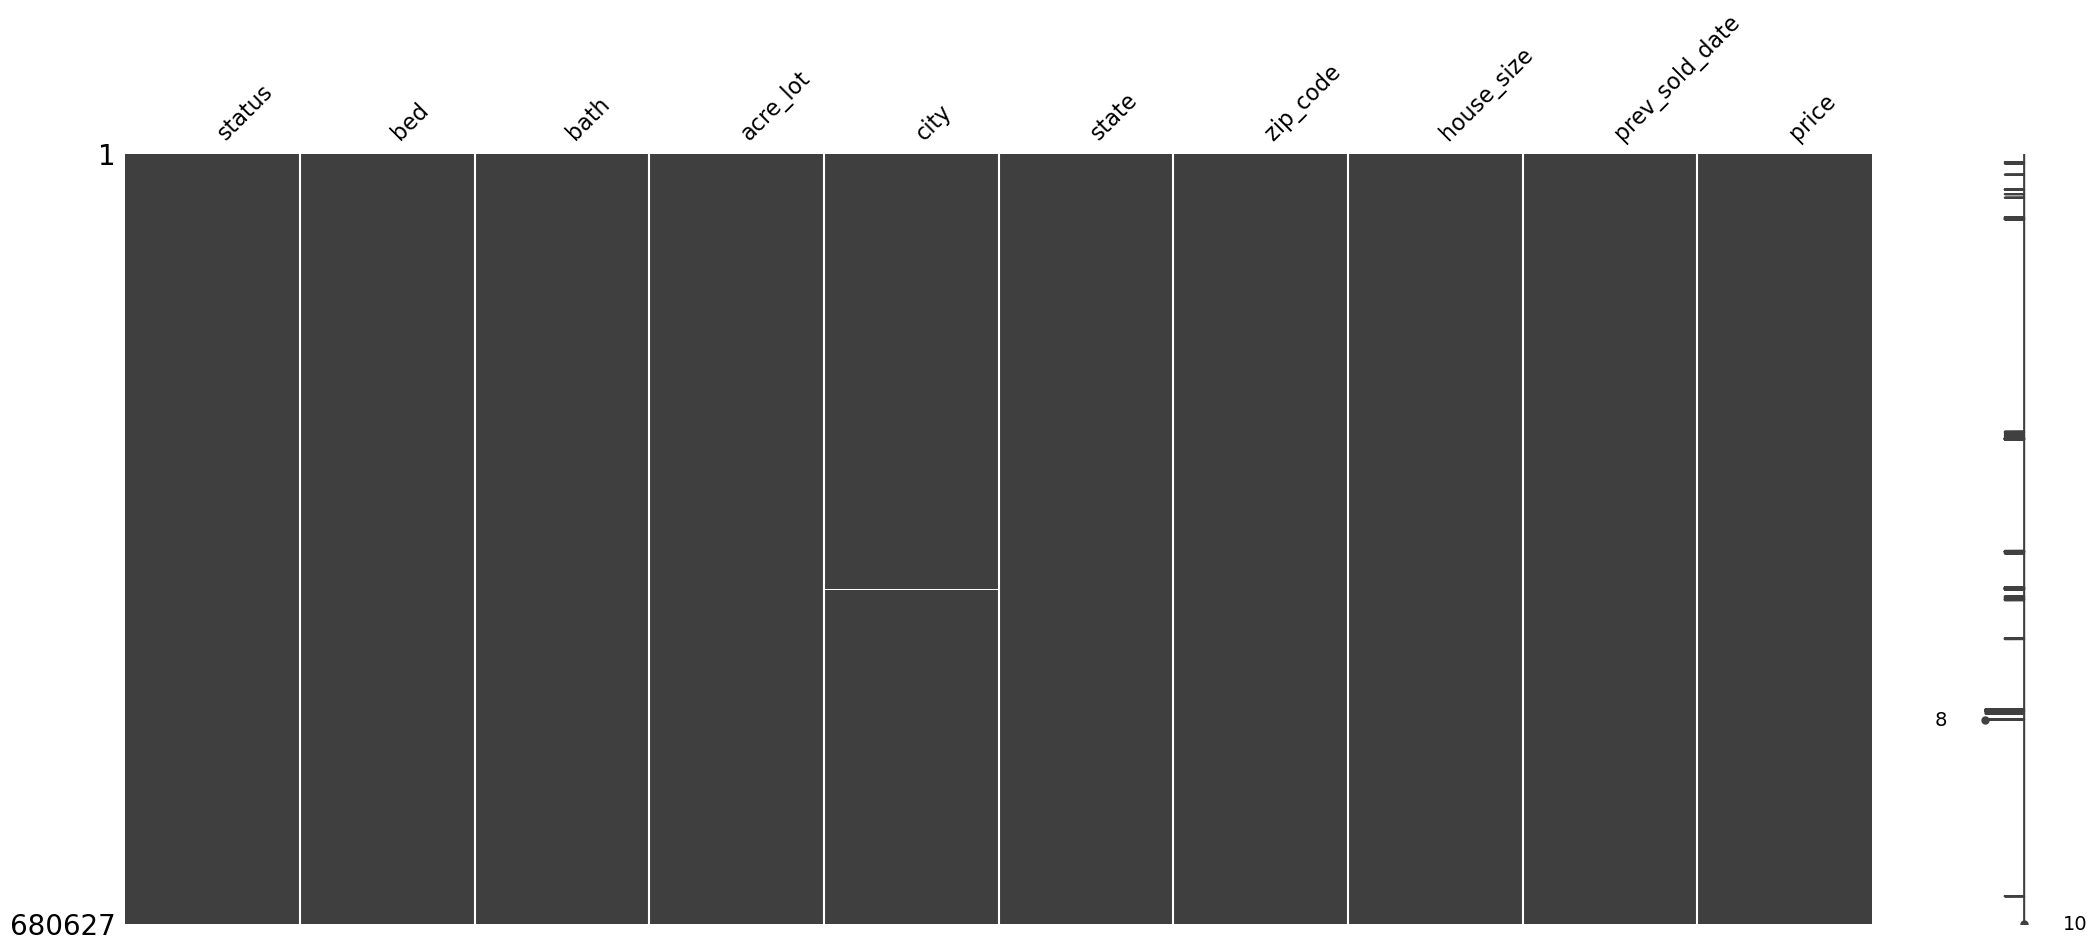

In [16]:
# Determine missingness
sorted_df1 = df1.sort_values(by='price')
msno.matrix(sorted_df1)
plt.show()

In [17]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,680627.0,3.788880,2.045016e+00,1.0,3.00,3.00,4.0,99.0
bath,680627.0,2.668323,2.031559e+00,1.0,2.00,2.00,3.0,198.0
acre_lot,680627.0,35.392146,1.315755e+03,0.0,0.12,0.29,1.0,100000.0
house_size,680627.0,2396.491149,3.848698e+03,122.0,1352.00,1894.00,2718.0,1450112.0
price,680627.0,741644.654704,1.545057e+06,1.0,249900.00,429000.00,749000.0,169000000.0


### 5.2 Handling Duplicate Rows

In [18]:
duplicate_df1 = df1[df1.duplicated()]
duplicate_df1

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
83,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,728.0,1500.0,2024-02-19,105000.0
87,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,2024-02-19,300000.0
88,for_sale,3.0,2.0,0.10,Lares,Puerto Rico,669.0,4161.0,2024-02-19,155000.0
94,for_sale,3.0,2.0,0.05,Yauco,Puerto Rico,698.0,1118.0,2024-02-19,122500.0
95,for_sale,3.0,2.0,3.88,San Sebastian,Puerto Rico,685.0,4000.0,2024-02-19,575000.0
...,...,...,...,...,...,...,...,...,...,...
680619,for_sale,3.0,2.0,4.60,Gerry,New York,14740.0,1470.0,17 - 02 - 02,145000.0
680622,for_sale,3.0,1.0,0.10,Dunkirk,New York,14048.0,1002.0,17 - 04 - 03,29900.0
680623,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,00 - 09 - 01,187900.0
680625,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,03 - 04 - 15,92000.0


In [19]:
df1.drop_duplicates(subset=["bed", "bath", "acre_lot", "city", "state", "zip_code", "house_size", "price"], inplace=True)

print(df1.shape)

(73835, 10)


In [20]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,73835.0,3.726444,1.799980e+00,1.0,3.00,3.00,4.0,99.0
bath,73835.0,2.652902,1.766944e+00,1.0,2.00,2.00,3.0,198.0
acre_lot,73835.0,27.789430,1.199420e+03,0.0,0.11,0.24,0.8,100000.0
house_size,73835.0,2347.600515,6.072635e+03,122.0,1331.00,1850.00,2659.0,1450112.0
price,73835.0,756649.081763,1.807618e+06,1.0,239900.00,400000.00,724900.0,169000000.0


### 5.3 Handling Outliers

In [21]:
# Handling Outliers
numeric_cols = ['bed', 'bath', 'acre_lot', 'house_size', 'price']
seventy_fifth = df1[numeric_cols].quantile(0.75)
twenty_fifth = df[numeric_cols].quantile(0.25)
df1_iqr = seventy_fifth - twenty_fifth

upper_threshold = seventy_fifth + (1.5 * df1_iqr)

lower_threshold = twenty_fifth - (1.5 * df1_iqr)

print('Upper_threshold: ')
print(upper_threshold)

print('\nLower_threshold: ')
print(lower_threshold)

Upper_threshold: 
bed                 7.00
bath                4.50
acre_lot            1.82
house_size       4892.50
price         1459750.00
dtype: float64

Lower_threshold: 
bed               -1.0
bath               0.5
acre_lot          -0.9
house_size     -1063.5
price        -499850.0
dtype: float64


In [22]:
count_less_than_536000 = (df1['price'] <= 536000).sum()
print(count_less_than_536000)

46019


In [23]:
count_more_than_1520000 = (df1['price'] > 1520000).sum()
print(count_more_than_1520000)

6358


In [24]:
null_acre_lot = (df1['acre_lot'] == 0.0).sum()
print(null_acre_lot)

79


In [25]:
price_less_20000 = (df1['price'] <= 20000).sum()
print(price_less_20000)

58


## 5. Conclusion